In [1]:
import torch
import numpy as np


In [31]:
a = torch.zeros(3,4)

print(a)



tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [68]:
class SimpleNN:
    def __init__(self,input_dim,num_neurons):
    
        self.w1 = torch.rand(input_dim,num_neurons,requires_grad=True)
        self.w2 = torch.rand(num_neurons,1,requires_grad=True)
        self.Loss = []
        self.b1 = torch.zeros(1,num_neurons,requires_grad=True)
        self.b2 = torch.zeros(1,1,requires_grad=True)

    
    def Tanh(self,x):
        return torch.tanh(x)
    
    
    
    
    def ReLU(self,x):
        return torch.relu(x)
    

    def softmax(self,x):
        ex = torch.exp(x - x.max(dim=1,keepdim=True).values)
        return ex / ex.sum(dim=1,keepdim=True)

    def cross_entropy(self,perdicted,target): 
        per_sample = - torch.sum(target * torch.log(perdicted + 1e-12),dim=1) 
        return per_sample.mean()
        
    



    def forward(self,X):

        self.z1 = X @ self.w1 + self.b1

        self.h1 = self.ReLU(self.z1)

        self.z2 = self.h1 @ self.w2 + self.b2

        self.y_hat = self.softmax(self.z2)

        return self.y_hat
    


    def back_prop(self,target,lr=1e-3):
        loss_value =  self.cross_entropy(self.y_hat,target=target)
        self.Loss.append(loss_value.item())

        #clearing old gradient good practice
        if self.w1.grad is not None:
            self.w1.grad.zero_()
            self.b1.grad.zero_()
            self.w2.grad.zero_()
            self.b2.grad.zero_()

        #clac the gradient

        loss_value.backward()


        with torch.no_grad():
            self.w1 -= lr * self.w1.grad
            self.b1 -= lr * self.b1.grad

            self.w2 -= lr * self.w2.grad
            self.b2 -= lr * self.b2.grad

        #after calling torch.no_grad the gradient should be re-enabled
        self.w1.requires_grad_(True)
        self.b1.requires_grad_(True)
        self.w2.requires_grad_(True)
        self.b2.requires_grad_(True)


        


      



In [75]:
import torch

class SimpleNN:
    def __init__(self, input_dim, num_neurons):

        self.w1 = torch.randn(input_dim, num_neurons, requires_grad=True) * 0.01
        self.b1 = torch.zeros(1, num_neurons, requires_grad=True)

        # FIXED: OUTPUT MUST BE 10 FOR DIGITS
        self.w2 = torch.randn(num_neurons, 10, requires_grad=True) * 0.01
        self.b2 = torch.zeros(1, 10, requires_grad=True)

        self.Loss = []

    def ReLU(self, x):
        return torch.relu(x)

    def softmax(self, x):
        ex = torch.exp(x - x.max(dim=1, keepdim=True).values)
        return ex / ex.sum(dim=1, keepdim=True)

    def cross_entropy(self, predicted, target):
        per_sample = -torch.sum(target * torch.log(predicted + 1e-12), dim=1)
        return per_sample.mean()

    def forward(self, X):
        self.z1 = X @ self.w1 + self.b1
        self.h1 = self.ReLU(self.z1)
        self.z2 = self.h1 @ self.w2 + self.b2
        self.y_hat = self.softmax(self.z2)
        return self.y_hat

    def back_prop(self, target, lr=1e-3):

        loss = self.cross_entropy(self.y_hat, target)
        self.Loss.append(float(loss.detach()))

        # backwards
        loss.backward()

        # update
        with torch.no_grad():
            self.w1 -= lr * self.w1.grad
            self.b1 -= lr * self.b1.grad
            self.w2 -= lr * self.w2.grad
            self.b2 -= lr * self.b2.grad

        # clear grads
        self.w1.grad.zero_()
        self.b1.grad.zero_()
        self.w2.grad.zero_()
        self.b2.grad.zero_()

        return loss


In [ ]:
model = SimpleNN(input_dim=64, num_neurons=100)

print(model.w1.grad, model.w2.grad)



None None


C:\Users\khesr\AppData\Local\Temp\ipykernel_26632\3792310739.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(model.w1.grad, model.w2.grad)


In [ ]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm  = scaler.transform(X_test)  # FIXED

# Tensors
X_train_t = torch.tensor(X_train_norm, dtype=torch.float32)
X_test_t  = torch.tensor(X_test_norm, dtype=torch.float32)

y_train_t = torch.tensor(y_train, dtype=torch.long)
y_test_t  = torch.tensor(y_test, dtype=torch.long)

# One-hot
y_train_oh = torch.eye(10)[y_train_t]
y_test_oh  = torch.eye(10)[y_test_t]



batch_size = 32
lr = 1e-3
epochs = 50

num_samples = X_train_t.shape[0]

for epoch in range(epochs):
    perm = torch.randperm(num_samples)

    for i in range(0, num_samples, batch_size):
        idx = perm[i:i+batch_size]

        X_batch = X_train_t[idx]
        y_batch = y_train_oh[idx]

        model.forward(X_batch)
        loss = model.back_prop(y_batch, lr=lr)

    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss = {loss:.4f}")


C:\Users\khesr\AppData\Local\Temp\ipykernel_26632\1494212508.py:42: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  self.w1 -= lr * self.w1.grad


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [61]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# load dataset
digits = load_digits()
X = digits.data        # shape (1797, 64)
y = digits.target      # labels 0–9

print("X shape:", X.shape)
print("y shape:", y.shape)


# 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Train:", X_train.shape, "| Test:", X_test.shape)


X shape: (1797, 64)
y shape: (1797,)
Train: (1257, 64) | Test: (540, 64)


[ 796 1554   86  637 1048 1556  299  899 1362  273]


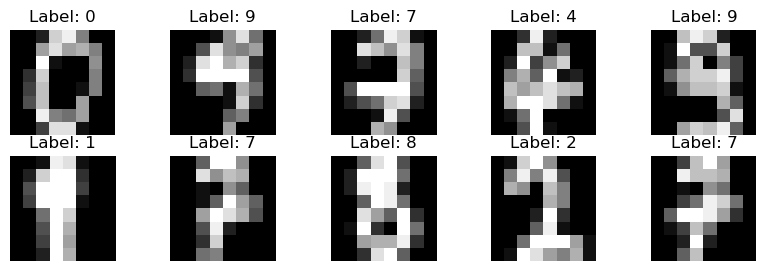

In [62]:
import matplotlib.pyplot as plt


idx = np.random.choice(len(X), 10, replace=False)
print(idx)
plt.figure(figsize=(10,3))

for i, img_idx in enumerate(idx):
    plt.subplot(2,5,i+1)
    plt.imshow(X[img_idx].reshape(8,8), cmap="gray")
    plt.title(f"Label: {y[img_idx]}")
    plt.axis("off")

plt.show()

In [69]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(X_train)
x_test_norm = scaler.fit_transform(X_test)

#converting them to tensor

X_train_t = torch.tensor(x_train_norm,dtype=torch.float32)
X_test_t = torch.tensor(x_test_norm,dtype=torch.float32)

y_train_t = torch.tensor(y_train,dtype=torch.long)
y_test_t = torch.tensor(y_test,dtype=torch.long)


print(y_test_t.dtype,x_test_t.dtype)

torch.int64 torch.float32


In [70]:
def onehot(label):
    return torch.eye(10)[label]

y_train_oh = onehot(y_train_t)
y_test_oh  = onehot(y_test_t)
print(y_test_oh[:3])




tensor([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])


In [71]:
model = SimpleNN(input_dim=64, num_neurons=100)


In [72]:
batch_size = 32
lr = 1e-3
epochs = 50
num_samples = X_train_t.shape[0]

for epoch in range(epochs):
    # shuffle indices
    perm = torch.randperm(num_samples)

    for i in range(0, num_samples, batch_size):
        idx = perm[i : i + batch_size]

        X_batch = X_train_t[idx]
        y_batch = y_train_oh[idx]

        # forward pass
        y_pred = model.forward(X_batch)

        # backward pass (your manual implementation)
        model.back_prop(y_batch, lr=lr)

    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss = {model.Loss[-1]:.4f}")

Epoch 0, Loss = 0.0000
Epoch 5, Loss = 0.0000
Epoch 10, Loss = 0.0000
Epoch 15, Loss = 0.0000
Epoch 20, Loss = 0.0000
Epoch 25, Loss = 0.0000
Epoch 30, Loss = 0.0000
Epoch 35, Loss = 0.0000
Epoch 40, Loss = 0.0000
Epoch 45, Loss = 0.0000
